In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

from spart.utils.databases import Database

In [16]:
%%capture
patricks = Database("uwb97xd/def2tzvpd", "./patricks_set_data/data_database_uwb97xd.json")
methyl = Database("uwb97xd/def2tzvpd", "./methyl_halides/data_from_uwb97xd.json")

In [17]:
%%capture
# AVH s 
patricks_avh = Database("uwb97xd/def2tzvpd", "./patricks_set_data/data_uwb97xd_avh.json")
all_patricks = Database("uwb97xd/def2tzvpd", "./patricks_set_data/data_database_combined_patrick.json")

In [18]:
# patric.get_atomic_dipoles(atnum=1,scheme="VH")
# methyl.get_atomic_dipoles(atnum=1, scheme="VH")

In [19]:
scheme_list = ['VH']
# create dipole with point charge approximation
calculated = [] 
calculated.extend(all_patricks.get_approx_molecular_dipoles_point_charge_approx(scheme='VH'))

print(calculated)

[array([-1.95131778e-01, -1.17248699e+00,  9.15860239e-08]), array([ 9.59239302e-02, -1.55391972e-01, -2.75584785e-07]), array([ 2.95989016e-07, -7.37034927e-01,  2.29563059e-01]), array([-1.10174890e+00,  4.88131494e-07,  3.49366885e-01]), array([0.44608423, 1.42220627, 0.        ]), array([4.88407703e-07, 3.89959158e-07, 9.15541775e-08]), array([ 1.06252933e+00,  8.82450408e-01, -5.08842521e-08]), array([ 2.88243203e-01, -1.48647919e+00, -7.50827055e-06]), array([-2.06435463e-01, -9.48176188e-01,  2.15882566e-06]), array([0.68230703, 0.49493614, 0.08068183]), array([ 0.67236702, -0.25183359,  0.11098969]), array([ 1.59591116e-01, -9.89503397e-01, -7.61383127e-07]), array([-2.28017314e-02,  3.05987489e-01,  1.60154688e-07]), array([-9.46054528e-01, -6.80562435e-02, -8.25580418e-08]), array([ 3.66963888e-01, -1.85246322e-01,  7.13710084e-05]), array([-0.86434832, -1.3543467 , -0.09769491]), array([ 2.57434434e-01, -2.47393955e-01,  2.95571230e-06]), array([-3.20149335e-01,  5.50818295e

In [20]:
we_have = list()
we_have.extend(all_patricks.get_approx_molecular_dipoles_exact(scheme='VH'))

In [21]:
# differnce of calculated and we_have lists 

diff = [calc - have for calc, have in zip(calculated, we_have)]
for i, d in enumerate(diff):
    for j in range(3):
        if d[j] > 1e-3:
            print(f"Difference  for element {i} in mu{j}: {d[j]}")
            break

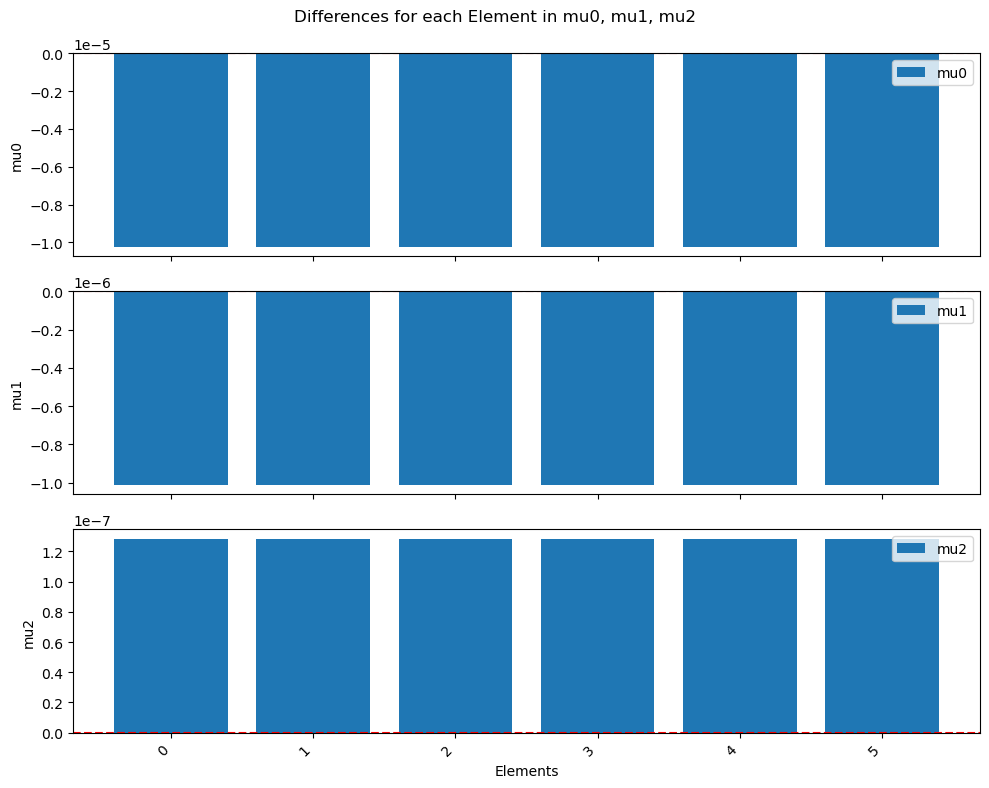

In [22]:
differences = []
for i in range(2):
    diff = [np.array(calc) - np.array(have) for calc, have in zip(calculated[i], we_have[i])]
    for elem_diff in diff:
        differences.append(elem_diff)

# Prepare data for plotting
diff_values = np.array(differences)
n_elements = diff_values.shape[0]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

mu_labels = ['mu0', 'mu1', 'mu2']
x_labels = [f'{i}' for i in range(n_elements)]

for j in range(3):
    axes[j].bar(range(n_elements), diff_values[j], label=mu_labels[j])
    axes[j].axhline(color='r', linestyle='--')
    axes[j].set_ylabel(mu_labels[j])
    axes[j].legend()
    
axes[2].set_xticks(range(n_elements))
axes[2].set_xticklabels(x_labels, rotation=45, ha='right')

plt.xlabel('Elements')
plt.suptitle('Differences for each Element in mu0, mu1, mu2')
plt.tight_layout()
plt.show()

Difference for element 0 in mu0: -1.021836647005503e-05
Difference for element 0 in mu1: -1.0116380548819137e-06
Difference for element 0 in mu2: 1.2819429739963084e-07
Difference for element 1 in mu0: 2.884260029770158e-05
Difference for element 1 in mu1: -4.871175137993733e-05
Difference for element 1 in mu2: -2.678937597243338e-07
Difference for element 2 in mu0: 1.3083604352703837e-07
Difference for element 2 in mu1: 5.389163310942635e-06
Difference for element 2 in mu2: -4.177764086121805e-06
Difference for element 3 in mu0: -4.055941138192409e-05
Difference for element 3 in mu1: -1.1977324039513793e-07
Difference for element 3 in mu2: 3.5511966552381757e-06
Difference for element 4 in mu0: -4.984411464320493e-05
Difference for element 4 in mu1: 6.565899399868513e-05
Difference for element 4 in mu2: -0.00035999804664077245
Difference for element 5 in mu0: 5.00572882117245e-07
Difference for element 5 in mu1: 3.980054707614089e-07
Difference for element 5 in mu2: 9.169774126127628e

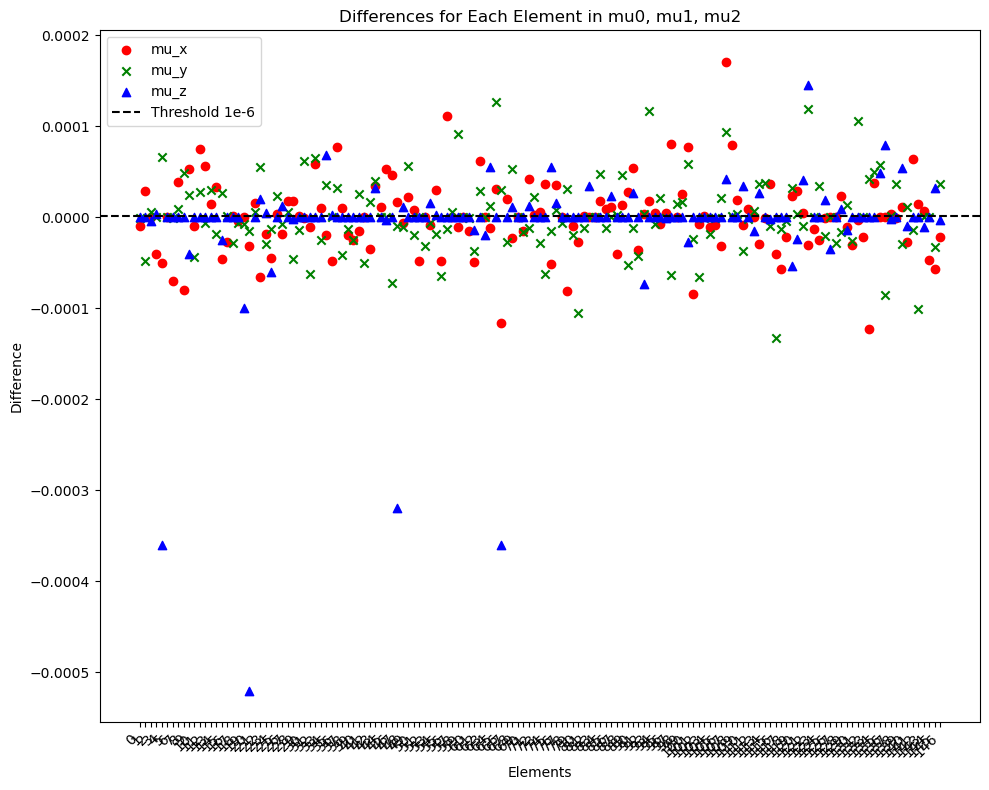

In [23]:
# Calculate differences and store them
diff = [np.array(calc) - np.array(have) for calc, have in zip(calculated, we_have)]
significant_diffs = []
elements = []
mus = []

for i, d in enumerate(diff):
    for j in range(3):
        print(f"Difference for element {i} in mu{j}: {d[j]}")
        significant_diffs.append(d[j])
        elements.append(i)
        mus.append(j)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['r', 'g', 'b']
markers = ['o', 'x', '^']
labels = ['mu_x', 'mu_y', 'mu_z']

# Create a scatter plot for each significant difference
for mu in range(3):
    x_vals = [elements[i] for i in range(len(elements)) if mus[i] == mu]
    y_vals = [significant_diffs[i] for i in range(len(significant_diffs)) if mus[i] == mu]
    ax.scatter(x_vals, y_vals, label=labels[mu], color=colors[mu], marker=markers[mu])

# Draw reference line
ax.axhline(1e-6, color='k', linestyle='--', label='Threshold 1e-6')

# Setting labels and legends
ax.set_xlabel('Elements')
ax.set_ylabel('Difference')
ax.set_xticks(range(len(calculated)))
ax.set_xticklabels([f'{i}' for i in range(len(calculated))], rotation=45, ha='right')
ax.legend()

plt.title('Differences for Each Element in mu0, mu1, mu2')
plt.tight_layout()
plt.show()

Check the charges for d-avh and avh

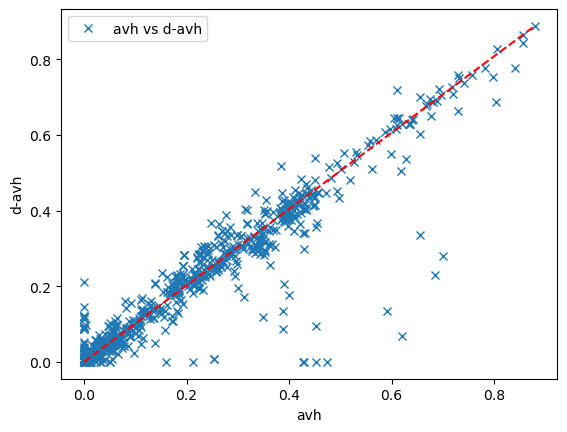

In [24]:
# avh=patricks_avh.get_charges(atnum=None, scheme="AVH")
# d_avh = patricks.get_charges(atnum=None, scheme="VH") 

avh = all_patricks.get_charges(atnum=None, scheme="AVH")
d_avh = all_patricks.get_charges(atnum=None, scheme="VH")

pos_avh = list()
pos_d_avh = list()
# filter out all -ve values
for atom,atom_charge in enumerate(avh):
        if atom_charge < 0:
            pos_avh.append(0)
        else:
            pos_avh.append(atom_charge)

for atom,atom_charge in enumerate(d_avh):
        if atom_charge < 0:
            pos_d_avh.append(0)
        else:
            pos_d_avh.append(atom_charge)

fig, ax = plt.subplots()
ax.plot(pos_avh, pos_d_avh, 'x', label='avh vs d-avh')
ax.plot([0, max(pos_avh)], [0, max(pos_d_avh)], 'r--')
ax.set_xlabel('avh')
ax.set_ylabel('d-avh')
ax.legend()
plt.show()

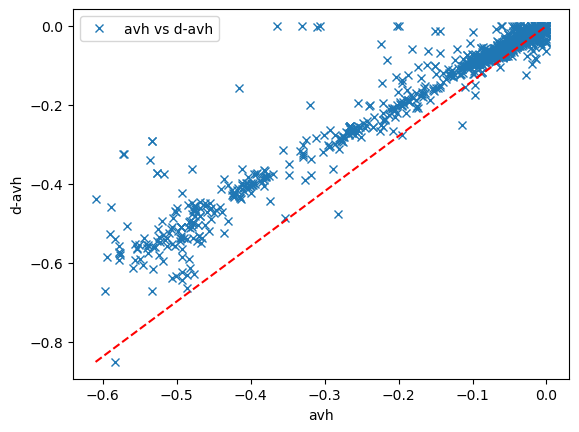

In [25]:
neg_avh = list()
neg_d_avh = list()

for atom,atom_charge in enumerate(avh):
        if atom_charge > 0:
            neg_avh.append(0)
        else:
            neg_avh.append(atom_charge)
for atom,atom_charge in enumerate(d_avh):
        if atom_charge > 0:
            neg_d_avh.append(0)
        else:
            neg_d_avh.append(atom_charge)

fig, ax = plt.subplots()
ax.plot(neg_avh, neg_d_avh, 'x', label='avh vs d-avh')
ax.plot([min(neg_avh), max(neg_avh)], [min(neg_d_avh), max(neg_d_avh)], 'r--')
ax.set_xlabel('avh')
ax.set_ylabel('d-avh')
ax.legend()
plt.show()

Sum of atomic moments is zero ( why?? ) 

In [26]:
atomic_moment= all_patricks.get_atomic_dipoles(atnum=None, scheme="VH")
sum_patricks = [0,0,0] 
for item in atomic_moment:
    for atoms in item:
        sum_patricks += atoms

print(f"sum of atomic moments in patrick's set {sum_patricks}")

atomic_moment_methyl = methyl.get_atomic_dipoles(atnum=None, scheme="VH")
sum_methyl = [0,0,0] 

for item in atomic_moment:
    for atoms in item:
        sum_methyl += atoms

print(f"sum of atomic moments in methyl's set {sum_methyl}")


sum of atomic moments in patrick's set [0.00104787 0.00104787 0.00104787]
sum of atomic moments in methyl's set [0.00104787 0.00104787 0.00104787]


In [29]:
atomic_moment_patrick_avh = all_patricks.get_approx_molecular_dipoles_exact(scheme="AVH")
atomic_moment_patrick_d_avh = all_patricks.get_approx_molecular_dipoles_exact(scheme="VH")

In [30]:
# Calculate the norm of the atomic dipole for each element
def calculate_norm(vector):
    return np.sqrt(np.sum(np.square(vector)))

flat_avh = [calculate_norm(avh_vec) for avh_vec in atomic_moment_patrick_avh]
flat_d_avh = [calculate_norm(avh_vec) for avh_vec in atomic_moment_patrick_d_avh]
flat_mehtyl_d_avh = [calculate_norm(avh_vec) for avh_vec in atomic_moment_patrick_avh]

print(atomic_moment_patrick_avh)
print(atomic_moment_patrick_d_avh)

[array([-1.95127738e-01, -1.17248608e+00,  3.52938369e-08]), array([ 9.58951628e-02, -1.55343647e-01,  7.91029467e-08]), array([ 1.16770801e-07, -7.37038609e-01,  2.29569590e-01]), array([-1.10169725e+00,  5.83684989e-07,  3.49360458e-01]), array([4.46113787e-01, 1.42212031e+00, 3.59996791e-04]), array([ 3.01502977e-09, -5.27764020e-08, -2.06946264e-09]), array([ 1.06259889e+00,  8.82452059e-01, -5.87717531e-08]), array([ 2.88200928e-01, -1.48648759e+00, -7.56969815e-06]), array([-2.06354523e-01, -9.48225726e-01,  2.06923508e-06]), array([0.68225187, 0.49491013, 0.08072383]), array([ 0.67237766, -0.25178957,  0.11098859]), array([ 1.59515053e-01, -9.89532273e-01, -7.58223041e-07]), array([-2.28566040e-02,  3.05988741e-01,  6.23346984e-09]), array([-9.46066055e-01, -6.80866946e-02,  6.78435769e-10]), array([ 3.66928586e-01, -1.85230851e-01,  7.13638325e-05]), array([-0.86430071, -1.3543681 , -0.09767428]), array([ 2.57461852e-01, -2.47395622e-01,  2.95530974e-06]), array([-3.20147044e-0

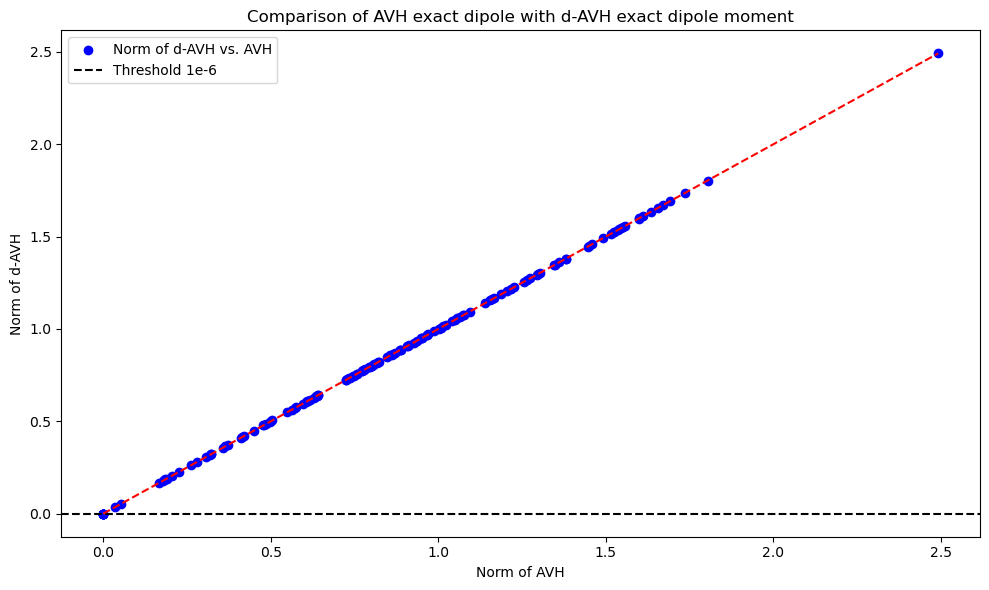

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot
ax.scatter(flat_avh, flat_d_avh, color='blue', label='Norm of d-AVH vs. AVH')

# Draw reference line
ax.axhline(1e-6, color='k', linestyle='--', label='Threshold 1e-6')

ax.plot([min(flat_avh), max(flat_avh)], [min(flat_d_avh), max(flat_d_avh)], 'r--')
# Setting labels and legends
ax.set_xlabel('Norm of AVH')
ax.set_ylabel('Norm of d-AVH')
ax.legend()

plt.title('Comparison of AVH exact dipole with d-AVH exact dipole moment')
plt.tight_layout()
plt.show()

In [86]:
from numpy.linalg import norm
for s in all_patricks.systems:

        avh_charge= s.get_charge(scheme='AVH')
        vh_charge = s.get_charge(scheme='VH')
        # print(s.get_charge(scheme='AVH'))
        # print(s.get_charge(scheme='VH'))

        # print(max(s.get_charge(scheme='AVH') - s.get_charge(scheme='VH')))
        dipole = s.get_molecular_dipole()


        # hypothesis - sum of atomic dipole of a molecule should be zero 

        atomic_dipoles_avh = s.get_atomic_dipole(scheme='AVH')
        atomic_dipoles_d_avh = s.get_atomic_dipole(scheme='VH')

        sums = np.sum(atomic_dipoles_avh, axis=0) 
        sums_d_avh = np.sum(atomic_dipoles_d_avh, axis=0)


        dipole_vh = np.sum(s.atcoords * vh_charge.reshape(-1,1), axis=0)
        dipole_avh = np.sum(s.atcoords * avh_charge.reshape(-1,1), axis=0)

        cosine_vh = np.dot(dipole, dipole_vh) / (norm(dipole) * norm(dipole_vh))
        consine_avh = np.dot(dipole, dipole_avh) / (norm(dipole) * norm(dipole_avh))

        vh_norm = norm(dipole_vh)
        avh_norm = norm(dipole_avh)
        norm_true = norm(dipole)
        if abs(avh_norm- vh_norm) < 0.5:
            continue 

        data = s.draw(schemes=['VH','AVH'],save=True)

        data.show()

        print("The molecule is ",s.index, s.atnums)


        print("sum of atomic dipoles AVH",sums)
        print("sum of atomic dipoles d-AVH",sums_d_avh)

        print("cosine similarity vh",cosine_vh)
        print("cosine similarity avh",consine_avh)


        print("norm vh",vh_norm)
        print("norm avh",avh_norm)
        print("norm true",norm_true)

        print("vh dipole",dipole_vh)
        print("avh dipole",dipole_avh)
        print(" ")

The molecule is  0094 [6 7 7 6 6 6 1 1 1 1]
sum of atomic dipoles AVH [-5.25314958e-04  5.22151232e-01 -6.58167957e-07]
sum of atomic dipoles d-AVH [-4.55107721e-08  6.49024623e-06 -4.34346571e-10]
cosine similarity vh 1.0
cosine similarity avh 0.9999998906920434
norm vh 1.671537685859894
norm avh 1.1494170219586242
norm true 1.6715377104511067
vh dipole [3.87981887e-05 1.67153769e+00 2.01634175e-06]
avh dipole [5.64092086e-04 1.14941688e+00 2.67413888e-06]
 


1 molecule converted


0.5507905884113962

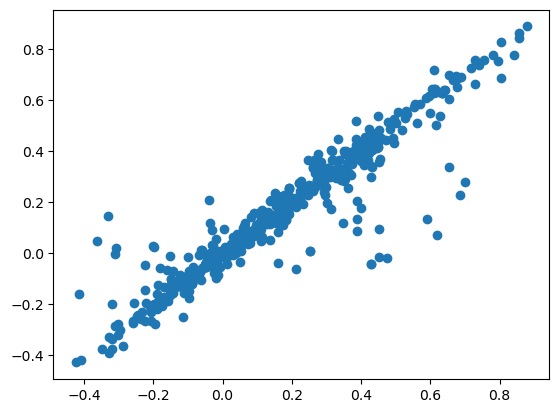

In [ ]:
y = all_patricks.get_charges(atnum=6, scheme="VH")
x = all_patricks.get_charges(atnum=6, scheme="AVH")

plt.scatter(x, y)
np.max(np.abs(np.array(x) -np.array(y)))